# Training a model to recognize sentiment in text

## Training a model (classifier) to recognize sentiment in text



### Preprocess data

In [14]:
import json

In [15]:
with open('data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 22000

### Splitting training and testing data

In [18]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size : ]

training_labels = labels[0 : training_size]
testing_labels = labels[training_size : ]

### Tokenizing training data

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

### Sequencing and padding both trainig and testing data

In [20]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
print(training_padded.shape)

(22000, 100)


padded.shape highlights that we got 22000 sequences each with 100 tokens

#### Need a numpy array to get it to work with TensorFlow

In [22]:
import numpy as np

In [23]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Embedding

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [26]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
688/688 - 5s - loss: 0.6608 - accuracy: 0.5840 - val_loss: 0.5534 - val_accuracy: 0.7772
Epoch 2/30
688/688 - 4s - loss: 0.4111 - accuracy: 0.8385 - val_loss: 0.3719 - val_accuracy: 0.8378
Epoch 3/30
688/688 - 5s - loss: 0.3011 - accuracy: 0.8803 - val_loss: 0.3458 - val_accuracy: 0.8560
Epoch 4/30
688/688 - 4s - loss: 0.2522 - accuracy: 0.9015 - val_loss: 0.3433 - val_accuracy: 0.8545
Epoch 5/30
688/688 - 4s - loss: 0.2181 - accuracy: 0.9153 - val_loss: 0.3420 - val_accuracy: 0.8586
Epoch 6/30
688/688 - 4s - loss: 0.1942 - accuracy: 0.9274 - val_loss: 0.3579 - val_accuracy: 0.8513
Epoch 7/30
688/688 - 3s - loss: 0.1733 - accuracy: 0.9359 - val_loss: 0.3680 - val_accuracy: 0.8545
Epoch 8/30
688/688 - 4s - loss: 0.1575 - accuracy: 0.9420 - val_loss: 0.3868 - val_accuracy: 0.8499
Epoch 9/30
688/688 - 4s - loss: 0.1412 - accuracy: 0.9497 - val_loss: 0.4031 - val_accuracy: 0.8505
Epoch 10/30
688/688 - 3s - loss: 0.1290 - accuracy: 0.9536 - val_loss: 0.4336 - val_accuracy: 0.8486

### Visualize model performance

In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

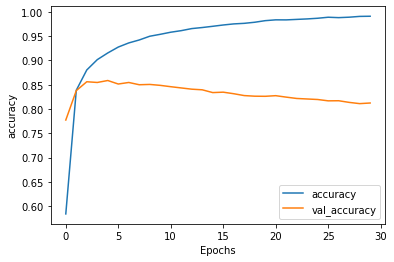

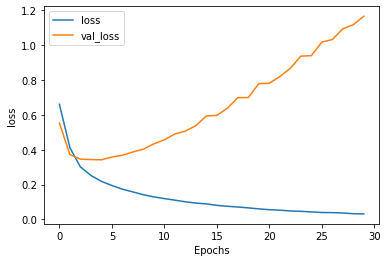

In [29]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Predict sarcasm within new sentences

#### Defining new data

In [30]:
sentence = ["granny starting to fear spiders in the garden might be real", 
"game of thrones season finale showing this sunday night"]

#### Sequencing and padding to the same length as training data

In [31]:
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


#### Printing results

In [32]:
print(model.predict(padded))

[[6.7695874e-01]
 [1.3145804e-04]]
